# <span style="color:red">  NOAA National Data Buoy Center   </span>

<img style="float: right;" src="DataSetSources.png" width="500">

## <span style="color:blue">  Project Decription: Create a surf forecast model using NOAA buoy data  </span>

## <span style="color:blue">  Links to Data: </span>

### [Edisto Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41004)

### [ENE Nassau Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41047)

## <span style="color:blue">  Author: </span>

### [*Evan Tanner*](https://github.com/surfevant)

## <span style="color:blue">  Bash Script for Transforming Raw Data into CSV Format: </span>

### <span style="color:teal"> 1. Navigate into the raw-data directory and execute extractData.sh script </span>

###  `cd DataSets/raw-data`

###  `./extractData.sh`

<img style="float: left;" src="BashScript.png" width="450">

In [1]:
#import Libraries
import os
import pandas as pd
import numpy as np
from IPython.display import display, HTML

#will have to change depending on relative os path
os.chdir('/home/loki/Desktop/Data210Project/Data-Mining-Project/DataSets')

#dataframes for feature extraction (need to clean)
nsTemp = pd.read_csv('Edisto.csv')
osTemp = pd.read_csv('Bahamas.csv')

#dropping TIDE and VIS_MI 99 values
nsDf = nsTemp.drop(columns=['VIS','TIDE'])
osDf = osTemp.drop(columns=['VIS','TIDE'])

#creating new column headers with metrics
osDf.columns = ['YY','MM','DD','hh','mm','WDIR_degt','WSPD_ms','GST_ms','WVHT_m','DPD_sec',
                  'APD_sec','MWD_degt', 'PRES_hpa','ATMP_degc','WTMP_degc','DEWP_degc']
nsDf.columns = ['YY','MM','DD','hh','mm','WDIR_degt','WSPD_ms','GST_ms','WVHT_m','DPD_sec',
                  'APD_sec','MWD_degt', 'PRES_hpa','ATMP_degc','WTMP_degc','DEWP_degc']

#dropping the first row
osDf = osDf.drop(osDf.index[[0]])
nsDf = nsDf.drop(nsDf.index[[0]])

#set data types for columns
nsDf = nsDf.apply(pd.to_numeric)
osDf = osDf.apply(pd.to_numeric)

#Dropping the errors(99,999,9999)
nsDf = nsDf.replace(99,np.NaN)
nsDf = nsDf.replace(999,np.NaN)
nsDf = nsDf.replace(9999,np.NaN)

osDf = osDf.replace(99,np.NaN)
osDf = osDf.replace(999,np.NaN)
osDf = osDf.replace(9999,np.NaN)

In [2]:
#check data was loaded for both sets
print("Nearshore: ")
display(nsDf.head(3))
print("Offshore:")
display(osDf.head(3))

Nearshore: 


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
1,2014,12,31,23,50,18.0,4.9,7.3,1.25,10.81,5.21,85.0,1027.7,11.3,23.4,3.5
2,2015,1,1,0,50,17.0,5.1,7.2,1.21,6.25,5.09,69.0,1027.9,11.4,23.2,3.3
3,2015,1,1,1,50,2.0,5.0,6.6,1.21,10.81,5.39,76.0,1028.2,11.3,22.9,1.8


Offshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
1,2014,12,31,23,50,97.0,1.8,2.7,1.24,8.33,5.75,4.0,1022.1,23.6,25.4,19.6
2,2015,1,1,0,50,94.0,1.6,2.3,1.29,7.14,5.89,100.0,1022.2,23.8,25.4,19.9
3,2015,1,1,1,50,168.0,0.1,0.4,1.22,8.33,5.96,11.0,1022.4,23.9,25.4,19.6


In [52]:
#dimensions of Dataframes
print("Nearshore Shape: " + str(nsDf.shape))
print("Offshore Shape: "+ str(osDf.shape))

#data types same for nearshore and offshore
print("\n Data Types:\n")
display(nsDf.dtypes)

Nearshore Shape: (8642, 16)
Offshore Shape: (8728, 16)

 Data Types:



YY             int64
MM             int64
DD             int64
hh             int64
mm             int64
WDIR_degt    float64
WSPD_ms      float64
GST_ms       float64
WVHT_m       float64
DPD_sec      float64
APD_sec      float64
MWD_degt     float64
PRES_hpa     float64
ATMP_degc    float64
WTMP_degc    float64
DEWP_degc    float64
dtype: object

In [4]:
import seaborn as sns
#remove unnecessary data
nsStats = nsDf.drop(columns=['YY','MM', 'DD','hh','mm'])
osStats = osDf.drop(columns=['YY','MM', 'DD','hh','mm'])

#output of dataframe statistics
print("Nearshore Dataframe Stats:")
display(nsStats.describe())
print("Offshore Dataframe Stats:")
display(osStats.describe())

Nearshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8726.000000,8743.000000,8743.000000,8737.000000,8737.000000,8737.000000,8661.000000,8743.000000,8743.000000,8741.000000,8740.000000
mean,158.480862,6.806394,8.361867,1.332740,7.308141,5.118455,125.692068,1017.591799,22.001258,24.684521,17.177071
std,103.661669,3.155170,3.781697,0.637057,2.006430,0.817716,62.420257,5.922055,5.791476,3.220459,7.174560
min,1.000000,0.000000,0.100000,0.270000,2.740000,3.000000,1.000000,996.100000,-1.000000,13.400000,-9.100000
25%,54.000000,4.500000,5.600000,0.880000,5.560000,4.490000,85.000000,1013.700000,19.200000,21.900000,13.500000
50%,178.000000,6.600000,8.000000,1.170000,7.140000,5.000000,116.000000,1017.300000,23.400000,24.900000,19.300000
75%,235.000000,8.900000,10.900000,1.620000,9.090000,5.640000,150.000000,1021.300000,26.600000,27.700000,22.700000
max,360.000000,17.800000,22.800000,4.870000,14.810000,8.720000,359.000000,1034.700000,29.600000,31.400000,26.500000


Offshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8689.000000,8725.000000,8724.000000,8719.000000,8719.00000,8719.000000,8670.000000,8727.000000,8725.000000,8724.000000,8723.000000
mean,151.436529,5.641937,6.982932,1.625986,8.81651,6.146150,114.966782,1018.190867,25.293318,26.523705,20.513562
std,84.730175,2.808128,3.313301,0.826906,1.89357,0.944327,86.015598,4.600063,2.738242,2.354880,3.702322
min,1.000000,0.000000,0.100000,0.450000,3.57000,4.000000,1.000000,986.300000,16.400000,21.900000,6.100000
25%,85.000000,3.600000,4.600000,1.080000,7.69000,5.470000,60.000000,1015.800000,23.500000,24.700000,18.700000
50%,140.000000,5.500000,6.600000,1.430000,8.33000,6.050000,100.000000,1018.400000,25.100000,25.900000,21.500000
75%,209.000000,7.500000,9.100000,1.970000,10.00000,6.700000,128.000000,1021.200000,28.000000,28.900000,23.300000
max,360.000000,19.300000,25.000000,7.560000,16.00000,11.060000,360.000000,1029.400000,31.000000,32.400000,26.000000


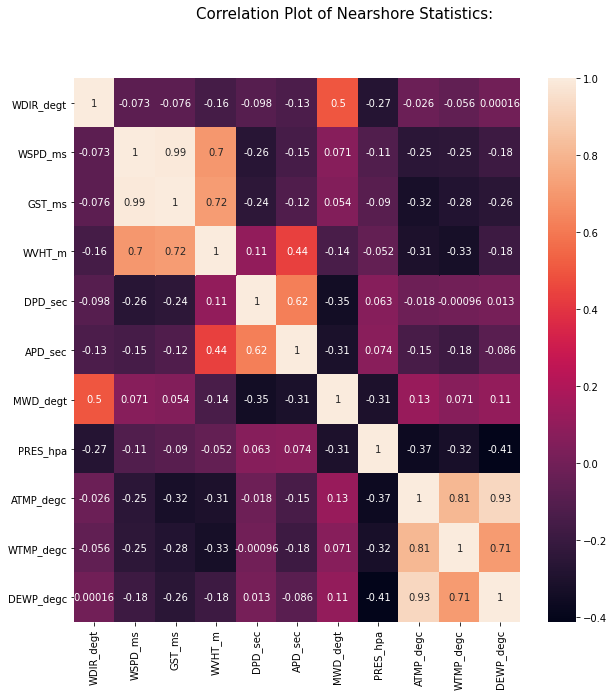

In [5]:
#correlation matrix of nearshore
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
plt.suptitle("Correlation Plot of Nearshore Statistics:", fontsize=15)
corr = nsStats.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)
plt.show()

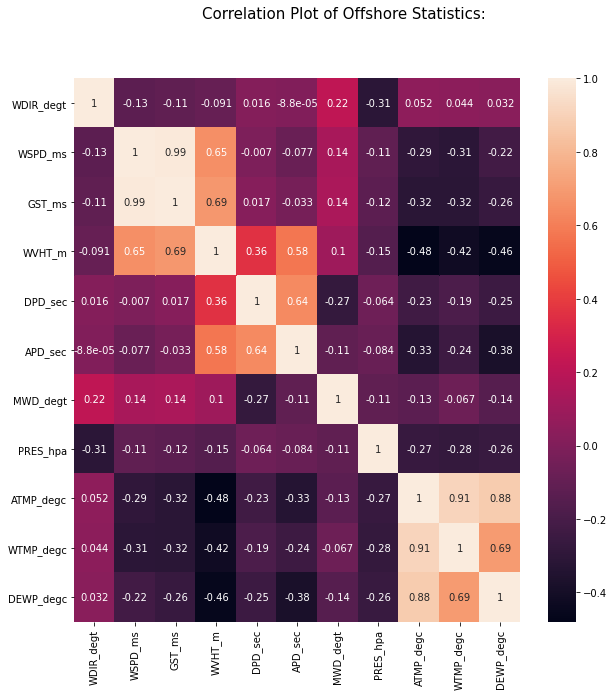

In [6]:
#correlation matrix of offshore
fig, ax = plt.subplots(figsize=(10,10))
plt.suptitle("Correlation Plot of Offshore Statistics:", fontsize=15)
corr = osStats.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)
plt.show()

In [7]:
#nearshore wave height statistics
print('Nearshore Wave Height Statistics')
display(nsDf['WVHT_m'].describe())

#offshore wave height statistics
print('Offshore Wave Height Statistics')
display(osDf['WVHT_m'].describe())

Nearshore Wave Height Statistics


count    8737.000000
mean        1.332740
std         0.637057
min         0.270000
25%         0.880000
50%         1.170000
75%         1.620000
max         4.870000
Name: WVHT_m, dtype: float64

Offshore Wave Height Statistics


count    8719.000000
mean        1.625986
std         0.826906
min         0.450000
25%         1.080000
50%         1.430000
75%         1.970000
max         7.560000
Name: WVHT_m, dtype: float64

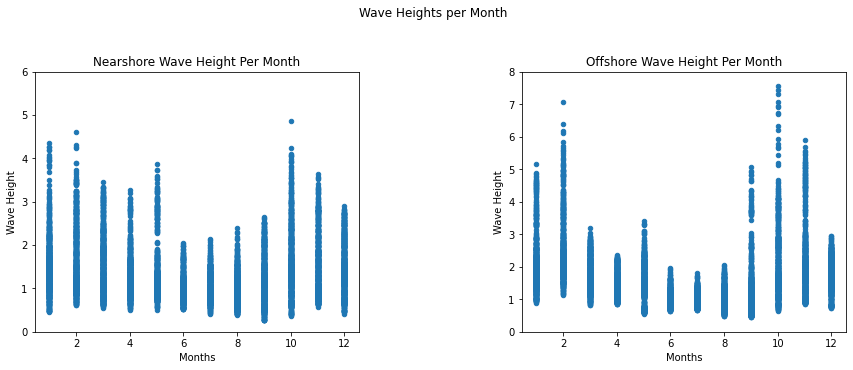

In [39]:
#the wave height for months in the year (nearshore)

#configure graphs for subplots
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace=.5, top=.8)
plt.suptitle('Wave Heights per Month')

#the wave height for months in the year (nearshore)
nsPlot = nsDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,6), ax = ax)
nsPlot.set_title('Nearshore Wave Height Per Month')
nsPlot.set_xlabel('Months')
nsPlot.set_ylabel('Wave Height')

#the wave height for months in the year (offshore)
osPlot = osDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,8), ax = ax2)
osPlot.set_title('Offshore Wave Height Per Month')
osPlot.set_xlabel('Months')
osPlot.set_ylabel('Wave Height')
plt.show()

In [9]:
#returns the row(s) of largest wave height in nearshore data
print("Max Wave Height in Nearshore:")
display(nsDf[nsDf['WVHT_m']== nsDf['WVHT_m'].max()])

#returns the row of largest wave height in offshore data
print("Max Wave Height in Offshore:")
display(osDf[osDf['WVHT_m'] == osDf['WVHT_m'].max()])

#returns the row(s) of smallest wave height in nearshore data ( < 99 )
print("Smallest Wave Height in Offshore:")
display(osDf[osDf['WVHT_m'] == osDf['WVHT_m'].min()])

#returns the row(s) of smallest wave height in nearshore data
print("Smallest Wave(s) Height in Nearshore:")
display(nsDf[nsDf['WVHT_m' ] == nsDf['WVHT_m'].min()])

Max Wave Height in Nearshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6619,2015,10,4,5,50,135.0,10.8,13.1,4.87,10.0,7.76,89.0,999.8,24.7,27.2,23.7


Max Wave Height in Offshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6591,2015,10,3,18,50,70.0,19.3,25.0,7.56,9.09,9.0,120.0,986.9,27.1,28.8,23.8


Smallest Wave Height in Offshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5945,2015,9,6,17,50,320.0,0.4,0.9,0.45,8.33,5.77,111.0,1015.4,28.4,30.9,21.9


Smallest Wave(s) Height in Nearshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5922,2015,9,5,2,50,37.0,2.5,3.3,0.27,6.25,4.94,115.0,1015.7,27.9,29.2,24.0
5925,2015,9,5,5,50,21.0,1.4,2.1,0.27,11.43,4.97,82.0,1015.1,27.7,29.2,23.0
5926,2015,9,5,6,50,29.0,1.9,2.8,0.27,11.43,5.79,86.0,1014.9,27.6,29.1,23.4
5927,2015,9,5,7,50,8.0,5.4,6.3,0.27,10.81,5.59,84.0,1015.3,27.6,29.0,23.5


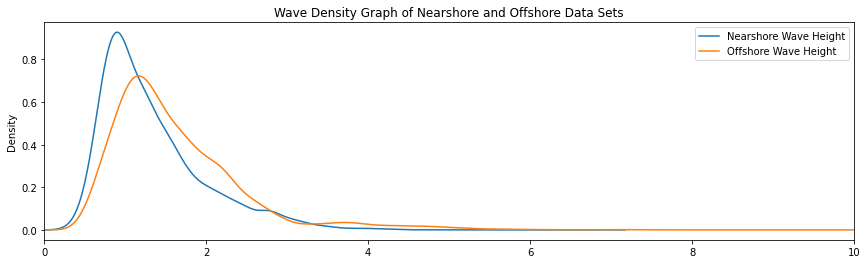

In [37]:
#Density Plot of Wave Heights and Offshore Winds

#extracting wave height from nearshore and offshore data
nsWaveDens = nsDf['WVHT_m']
osWaveDens = osDf['WVHT_m']


#creates plots for each wave height feature
ax = nsWaveDens.plot.kde(label = 'Nearshore Wave Height')
ax = osWaveDens.plot.kde(label = 'Offshore Wave Height')

#adds plot title and legend
plt.title("Wave Density Graph of Nearshore and Offshore Data Sets")
plt.subplots_adjust(right=2)
plt.xlim((0,10))
plt.legend(loc = "upper right")
plt.show()

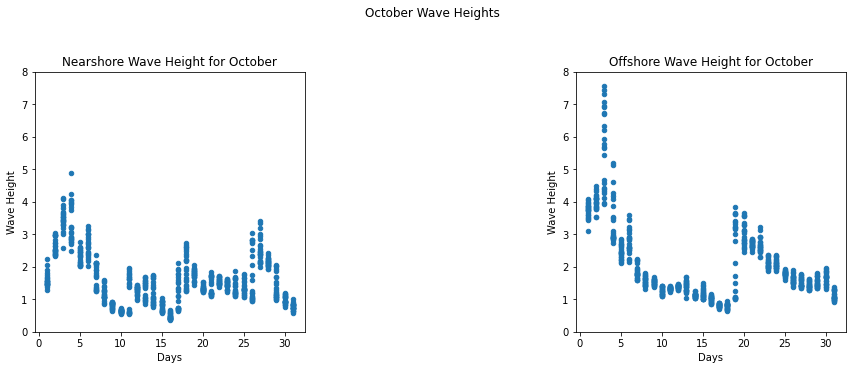

In [53]:
#october Scatter plot (wave size was biggest)
nsOct = nsDf[nsDf['MM'] == 10]
osOct = osDf[osDf['MM'] == 10]

#configure graphs for subplots
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace =1, top=.8)
plt.suptitle('October Wave Heights')

#could possibly find data from extremities
nsOctPlot = nsOct.plot(kind='scatter', x='DD', y='WVHT_m',ylim=(0,8), ax = ax)
nsOctPlot.set_title('Nearshore shore Wave Height in October')
nsOctPlot.set_title('Nearshore Wave Height for October')
nsOctPlot.set_xlabel('Days')
nsOctPlot.set_ylabel('Wave Height')

osOctPlot = osOct.plot(kind='scatter', x='DD', y='WVHT_m',ylim=(0,8), ax = ax2)
osOctPlot.set_title('Nearshore shore Wave Height in October')
osOctPlot.set_title('Offshore Wave Height for October')
osOctPlot.set_xlabel('Days')
osOctPlot.set_ylabel('Wave Height')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

#for clean surf conditions and wave height later
waveNs = nsDf
waveNs.loc[nsDf['WVHT_m'] > 1.2]

#dropping unnecessary
cleanNs = nsDf.drop(columns=['YY','MM', 'DD','hh','mm'])
cleanOs = osDf.drop(columns=['YY','MM', 'DD','hh','mm'])

#clean NaNs for PCA
cleanNs = cleanNs.dropna()
cleanOs = cleanOs.dropna()

#originalNs= np.where(originalNs['WVHT_m'] < 2, 'noSurf','surf')

#change to categorical values
cleanNs['WVHT_m'] = np.where(cleanNs['WVHT_m'] < 2, 'noSurf','surf')
cleanOs['WVHT_m'] = np.where(cleanOs['WVHT_m'] < 2, 'noSurf','surf')

#split data into test and training data sets( only need nearshore since where you surf)
nsTrain, nsTest = train_test_split(cleanNs, test_size=0.33)
osTrain, osTest = train_test_split(nsDf, test_size=0.33)

#test and train dimensions
print('Nearshore Test Size: ', nsTest.shape)
print('Offshore Test Size: ', osTest.shape)
print('Nearshore Train Size: ', nsTrain.shape)
print('Offshore Train Size: ', osTrain.shape)

Nearshore Test Size:  (2852, 11)
Offshore Test Size:  (2886, 16)
Nearshore Train Size:  (5790, 11)
Offshore Train Size:  (5857, 16)


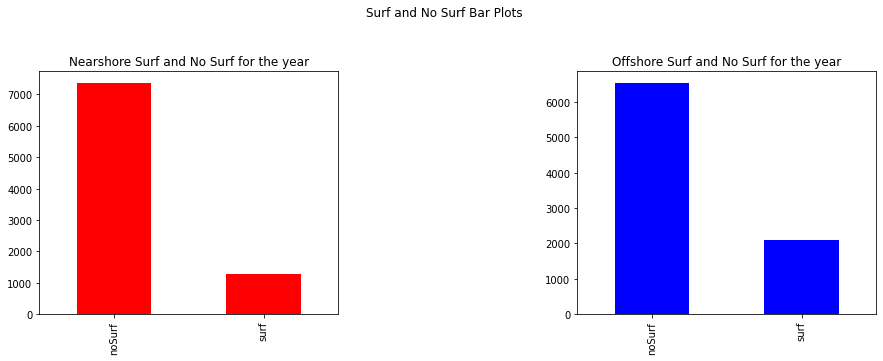

In [63]:
#bar graph for waves above 1.2 meters = surf, and less than 1.2 meters = nosurf

#configure graph position
fig = plt.figure(figsize=(15,5))
fig.suptitle('Surf and No Surf Bar Plots')
plt.subplots_adjust(wspace=.8,top=.8)
fig.tight_layout()

a = fig.add_subplot(1,2,1)
cleanNs['WVHT_m'].value_counts().plot(kind='bar', title='Nearshore Surf and No Surf for the year',color='red')

a = fig.add_subplot(1,2,2)
cleanOs['WVHT_m'].value_counts().plot(kind='bar', title='Offshore Surf and No Surf for the year',color='blue')
plt.show()

In [14]:
#split training data between target and predictor features
nsTrain_x = nsTrain.iloc[:, nsTrain.columns != 'WVHT_m']
nsTrain_y = nsTrain['WVHT_m']

#split testing data between target and predictor features
nsTest_x = nsTest.iloc[:, nsTest.columns != 'WVHT_m']
nsTest_y = nsTest['WVHT_m']

#nsTrain shape
print("nsTrain predictor features shape: ", nsTrain_x.shape)
print("nsTrain target feature shape: ", nsTrain_y.shape)

#nsTest shape
print("nsTest predictor features shape: ", nsTest_x.shape)
print("nsTest target feature shape: ", nsTest_y.shape)

nsTrain predictor features shape:  (5790, 10)
nsTrain target feature shape:  (5790,)
nsTest predictor features shape:  (2852, 10)
nsTest target feature shape:  (2852,)


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

#standardize the data sets
nsTrainX = StandardScaler().fit_transform(nsTrain_x)
#osTrain = StandardScaler().fit_transform(osTrain)

#principle component analysis
pca = decomposition.PCA(n_components=10)
pca.fit(nsTrainX)
trainX = pca.transform(nsTrainX)

print("Output of PCA:")
pd.DataFrame(trainX).head(5)

Output of PCA:


,0,1,2,3,4,5,6,7,8,9
0,-1.820941,0.376587,-0.419397,0.204935,-0.128303,-0.932836,0.417162,0.182273,0.079291,-0.030225
1,-2.579916,-0.312510,1.039340,0.427582,0.077850,0.356932,-0.343045,-0.651217,0.108463,0.110508
2,-0.685671,-0.659370,0.647598,0.004204,-0.869078,-0.041776,-0.839638,0.188883,0.128515,0.011951
3,1.192140,-1.164180,-0.812298,-0.037290,0.787735,0.184881,0.729345,1.448163,-0.079874,-0.056043
4,-1.215196,0.151013,-0.368883,0.090811,0.318981,-0.832337,0.387991,0.427206,-0.027342,-0.069291


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#fit the  model to the data
model = DecisionTreeClassifier()
model.fit(nsTrainX, nsTrain_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#predict values
model.predict(trainX)

array(['noSurf', 'noSurf', 'noSurf', ..., 'surf', 'surf', 'noSurf'],
      dtype=object)

In [18]:
from sklearn import metrics

#for training data (100% accuracy)
expected = nsTrain['WVHT_m']
predicted = model.predict(nsTrainX)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

      noSurf       1.00      1.00      1.00      4957
        surf       1.00      1.00      1.00       833

    accuracy                           1.00      5790
   macro avg       1.00      1.00      1.00      5790
weighted avg       1.00      1.00      1.00      5790

[[4957    0]
 [   0  833]]


In [19]:
#standardized data
nsTestX = StandardScaler().fit_transform(nsTest_x)

#principle Component Analysis.
pca = decomposition.PCA(n_components=10)
pca.fit(nsTestX)
testX = pca.transform(nsTestX)

#how well the model predicts on the test set (data not seen yet)
predicted = model.predict(testX)
print(metrics.classification_report(nsTest_y, predicted))
print(metrics.confusion_matrix(nsTest_y, predicted))

              precision    recall  f1-score   support

      noSurf       0.83      0.81      0.82      2421
        surf       0.08      0.10      0.09       431

    accuracy                           0.70      2852
   macro avg       0.46      0.45      0.46      2852
weighted avg       0.72      0.70      0.71      2852

[[1956  465]
 [ 388   43]]


In [20]:
metrics.accuracy_score(nsTest_y,predicted)

0.7009116409537167

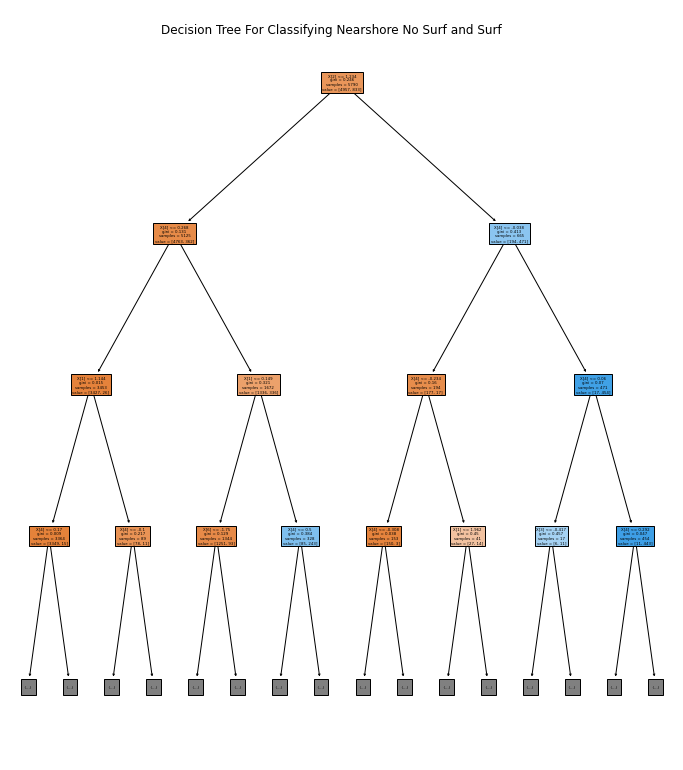

In [21]:
#graph the decision tree
plt.figure(figsize = (12,12))
plt.suptitle("Decision Tree For Classifying Nearshore No Surf and Surf")
plt.subplots_adjust(top=1)
tree.plot_tree(model,filled=True, max_depth=3);
plt.show()

In [22]:
#k means for wave height (to continue)
from sklearn.cluster import KMeans

kmeansNs = cleanNs[cleanNs['WVHT_m'] == "surf"]

kmeans = KMeans(n_clusters=3).fit(kmeansNs[['MWD_degt']])
centroids = kmeans.cluster_centers_
print(centroids)

#To be continued

[[217.30538922]
 [ 54.96354167]
 [119.58541267]]


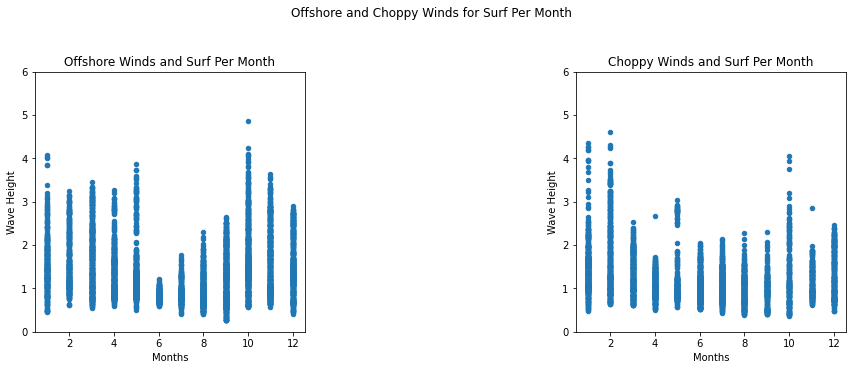

In [23]:
#wind direction (WSPD_ms) should be Northwest for offshore and over 2 meters wave height

#cleanNs already has 'surf' for waveheiht feature
bestDays = waveNs[waveNs['WDIR_degt'] > 170]
bestDays = waveNs[waveNs['WDIR_degt'] < 200]
subparDays = waveNs[waveNs['WDIR_degt'] < 170]
subparDays = waveNs[waveNs['WDIR_degt'] > 200]

#configure graph position
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace =1,top=.8)
plt.suptitle('Offshore and Choppy Winds for Surf Per Month ')

#graph showing clean(ish) waves for 2015
surfPlot = bestDays.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,6), ax=ax)
surfPlot.set_title('Offshore Winds and Surf Per Month')
surfPlot.set_xlabel('Months')
surfPlot.set_ylabel('Wave Height')

#graph showing choppy waves for 2015
subSurfPlot = subparDays.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,6),ax=ax2)
subSurfPlot.set_title('Choppy Winds and Surf Per Month')
subSurfPlot.set_xlabel('Months')
subSurfPlot.set_ylabel('Wave Height')
plt.show()

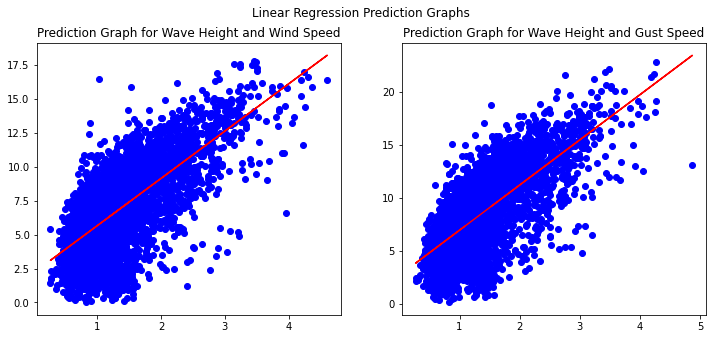

Wave Height and Windspeed Accuracy:  0.47881694295046334
Wave Height and Gust Accuracy:  0.3111400912329124


In [69]:
#linear regression waveheight and windspeed 
##got help from https://www.geeksforgeeks.org/python-linear-regression-using-sklearn
from sklearn.linear_model import LinearRegression

#drop nulls
waveNs.dropna(inplace=True)

#splice column for features to model
wvWsNs = waveNs[['WVHT_m','WSPD_ms']]
wvGsNs = waveNs[['WVHT_m','GST_ms']]

#create arrays of data
waveOneArray = np.array(wvWsNs['WVHT_m']).reshape(-1,1)
windArray = np.array(wvWsNs['WSPD_ms']).reshape(-1,1)

waveTwoArray = np.array(wvGsNs['WVHT_m']).reshape(-1,1)
gustArray = np.array(wvGsNs['GST_ms']).reshape(-1,1)

#split into training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(waveOneArray,windArray,test_size = .5)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(waveTwoArray,gustArray,test_size = .5)

#fit first model
lm = LinearRegression()
lm.fit(xtrain,ytrain)

#predict xtest using model
ypred = lm.predict(xtest)

#fit second model
lm2 = LinearRegression()
lm2.fit(xtrain2,ytrain2)

#predict xtest2 using model
ypred2 = lm2.predict(xtest2)

#configure graph position
fig = plt.figure(figsize=(12,5))
fig.suptitle("Linear Regression Prediction Graphs")
fig.tight_layout()

#plot the model prediction
a = fig.add_subplot(1,2,1)
plt.title("Prediction Graph for Wave Height and Wind Speed")
plt.scatter(xtest,ytest,color='blue')
plt.plot(xtest,ypred,color='red')

a = fig.add_subplot(1,2,2)
plt.title("Prediction Graph for Wave Height and Gust Speed")
plt.scatter(xtest2,ytest2,color='blue')
plt.plot(xtest2,ypred2,color='red')
plt.show()

print("Wave Height and Windspeed Accuracy: ",lm.score(xtest,ytest))
print("Wave Height and Gust Accuracy: ", lm.score(xtest2,ytest2))